In [1]:
#DATA OVERVIEW
#This dataset includes a range of physiological features recorded during sleep, which are as follows
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/Teju/Desktop/DS.csv")
data

,Respiration Rate,Temperature,Blood Oxygen Level,No.of hrs of Sleep,Heart Rate,Physical Exercise,Emotional Trauma,Headache,Stress Level
0,17.240,97.870,96.200,7,68.44,20,0,1,0
1,16.800,97.200,95.800,7,62.80,15,0,1,0
2,18.000,99.000,97.000,6,65.00,25,1,1,1
3,16.120,96.160,95.120,8,68.28,20,0,1,0
4,21.344,93.340,91.340,8,63.36,30,0,0,0
...,...,...,...,...,...,...,...,...,...
809,21.485,92.485,91.584,4,63.90,10,0,1,1
810,20.219,93.219,90.219,3,62.20,20,1,0,1
811,20.648,94.600,91.600,4,64.10,15,1,0,1
812,20.295,93.590,91.590,3,61.40,15,1,1,1


# DATA EXPLORATION

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Respiration Rate    814 non-null    float64
 1   Temperature         814 non-null    float64
 2   Blood Oxygen Level  814 non-null    float64
 3   No.of hrs of Sleep  814 non-null    int64  
 4   Heart Rate          814 non-null    float64
 5   Physical Exercise   814 non-null    int64  
 6   Emotional Trauma    814 non-null    int64  
 7   Headache            814 non-null    int64  
 8   Stress Level        814 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 57.4 KB


In [3]:
data.describe()

,Respiration Rate,Temperature,Blood Oxygen Level,No.of hrs of Sleep,Heart Rate,Physical Exercise,Emotional Trauma,Headache,Stress Level
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,21.707553,92.543840,90.829140,3.659705,64.047154,10.597052,0.345209,0.475430,0.998771
std,4.797870,5.350607,3.789729,2.838138,9.037915,8.500187,0.475729,0.499703,0.817249
min,16.000000,9.352000,65.400000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,18.612000,90.656000,88.692000,1.000000,57.150000,5.000000,0.000000,0.000000,0.000000
50%,20.764000,92.867000,90.912000,4.000000,62.560000,10.000000,0.000000,0.000000,1.000000
75%,24.048000,95.184000,93.530000,6.000000,69.080000,15.000000,1.000000,1.000000,2.000000
max,90.888000,99.830000,97.000000,10.000000,96.800000,30.000000,1.000000,1.000000,2.000000


In [4]:
data['Stress Level'].value_counts()

0    272
1    271
2    271
Name: Stress Level, dtype: int64

# DATA VISUALIZATION

<AxesSubplot:xlabel='Stress Level', ylabel='count'>

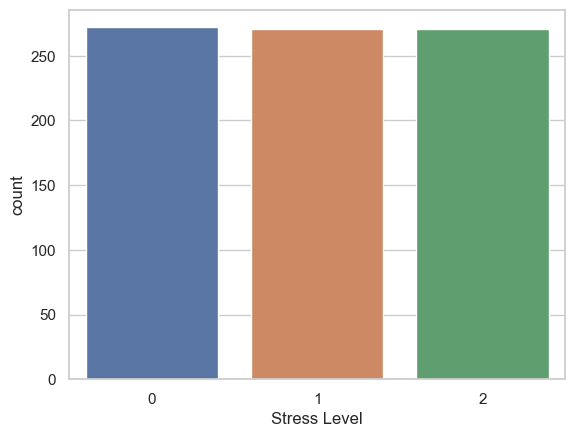

In [5]:
sns.set(style="whitegrid")
sns.countplot(x='Stress Level', data=data)

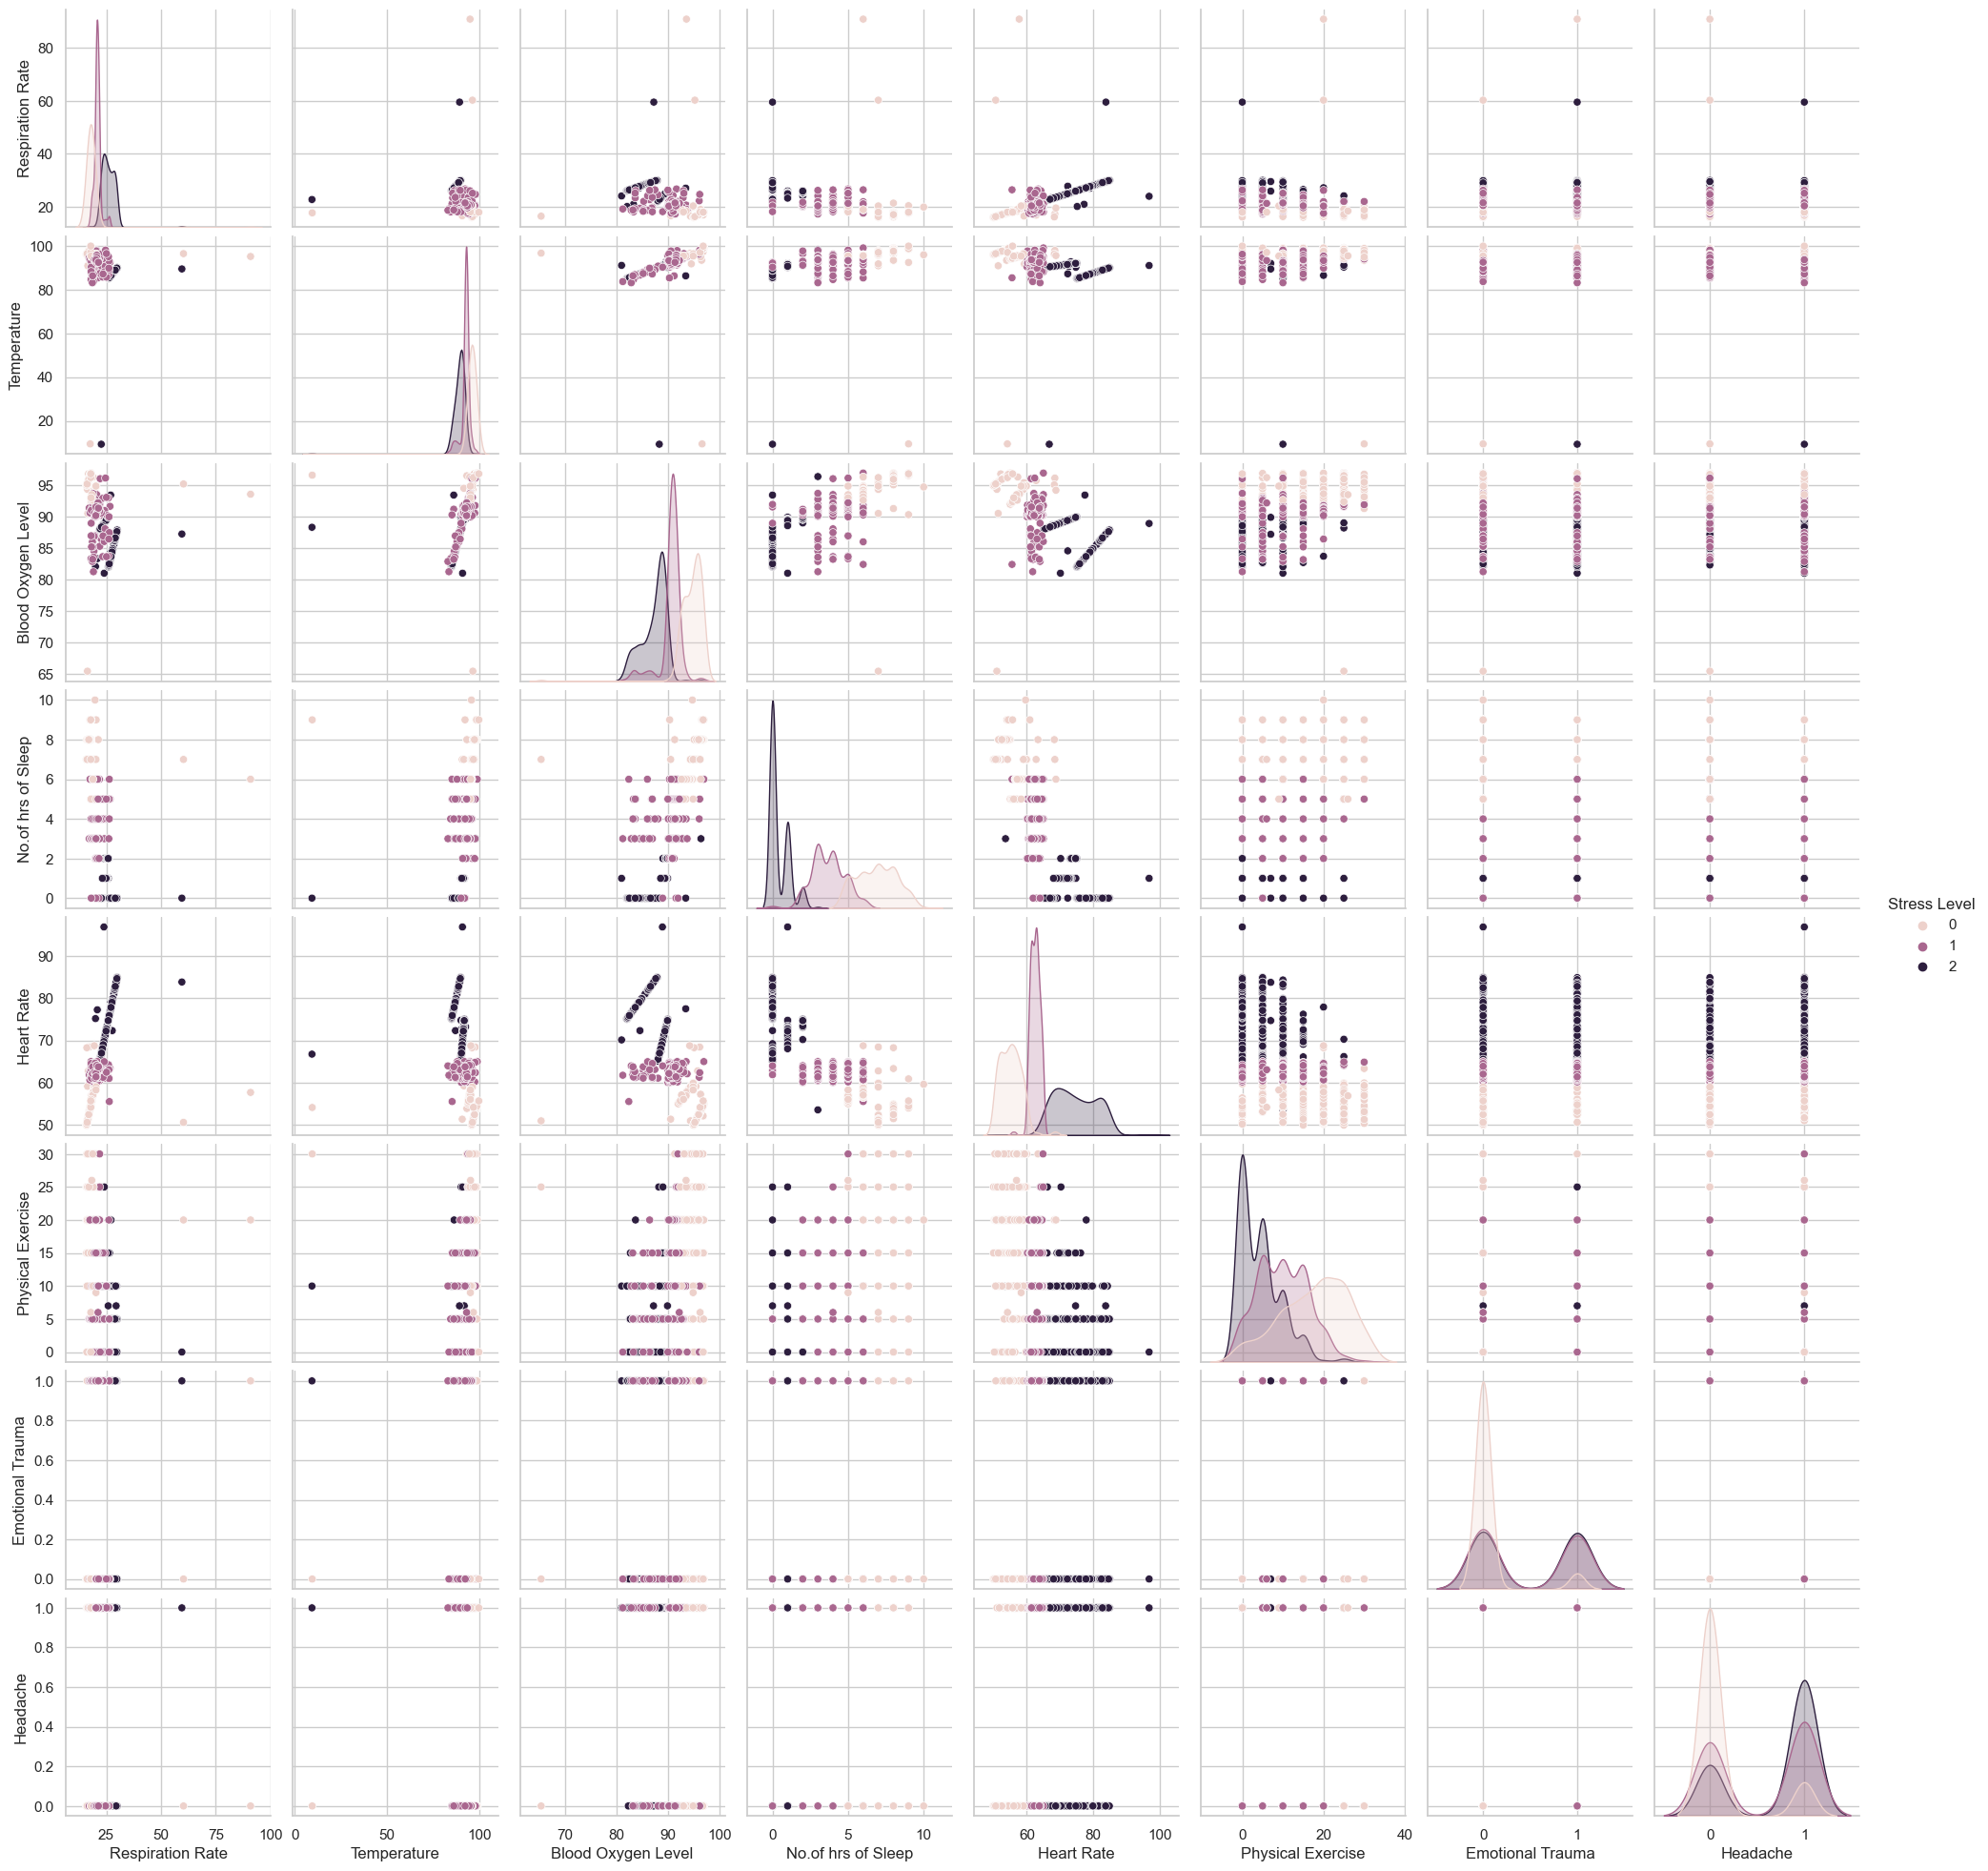

In [6]:
sns.pairplot(data, hue='Stress Level');

# Feature Selection
Before feeding the data into machine learning models, it's essential to scale the features to the same range. We will use Min-Max scaling for this purpose:


In [7]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [8]:
from mlxtend.preprocessing import minmax_scaling

X = data.drop('Stress Level', axis=1)
y = pd.DataFrame(data['Stress Level'])
X_scaled = minmax_scaling(X, columns=X.columns)
print( minmax_scaling(X, columns=X.columns))

     Respiration Rate  Temperature  Blood Oxygen Level  No.of hrs of Sleep  \
0            0.016558     0.978337            0.974684                 0.7   
1            0.010683     0.970932            0.962025                 0.7   
2            0.026707     0.990826            1.000000                 0.6   
3            0.001602     0.959438            0.940506                 0.8   
4            0.071360     0.928270            0.820886                 0.8   
..                ...          ...                 ...                 ...   
809          0.073243     0.918820            0.828608                 0.4   
810          0.056337     0.926933            0.785411                 0.3   
811          0.062066     0.942196            0.829114                 0.4   
812          0.057352     0.931033            0.828797                 0.3   
813          0.072121     0.917892            0.822816                 0.4   

     Heart Rate  Physical Exercise  Emotional Trauma  Headache 

# Feature Selection

Feature selection helps identify the most relevant features for our stress detection model. We will use Mutual Information and Correlation analysis to assess feature importance:


In [9]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_scaled, y), columns=['MI Scores'], index=X_scaled.columns)
corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['Stress Level']), columns=['Correlation'])
s_corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['Stress Level'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
Heart Rate,1.040164,0.880178,0.927756
No.of hrs of Sleep,0.915735,-0.930327,-0.931117
Blood Oxygen Level,0.913682,-0.795518,-0.882990
Respiration Rate,0.840003,0.637737,0.890768
Temperature,0.777516,-0.514833,-0.863408
Physical Exercise,0.260310,-0.637674,-0.634160
Headache,0.137687,0.480327,0.480391
Emotional Trauma,0.080013,0.364918,0.365018


# Data Splitting

Finally, we split the dataset into training and testing sets to facilitate model training and evaluation:


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                     stratify = y, shuffle=True)

In [12]:
# Model Selection and Initial Evaluation

We have chosen the following machine learning models for stress level prediction:

    Decision Tree Classifier
    Logistic Regression
    Gaussian Naive Bayes
    Linear Support Vector Classifier (Linear SVC)
    Support Vector Classifier (SVC)
    Random Forest Classifier
    k-Nearest Neighbors Classifier (KNN)
    Stochastic Gradient Descent Classifier (SGD)
    Gradient Boosting Classifier


SyntaxError: invalid syntax (1650065831.py, line 3)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

    from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, svc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 'SVC', 'Random Forest',
              'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = round(accuracy_score(y_pred, y_test) * 100, 2)
    acc_scores.append(acc_model)

In [14]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
5,Random Forest,100.00
0,Decision Tree,98.77
2,Gaussian Naive Bayes,98.77
8,Gradient Boosting,98.77
7,Stochastic Gradient Descent,95.71
3,Linear SVC,94.48
4,SVC,94.48
6,KNN or k-Nearest Neighbors,93.87
1,Logistic Regression,93.25


# Cross-Validation

We employ Repeated Stratified K-Fold Cross-Validation, which splits the dataset into multiple subsets while maintaining the distribution of stress levels. This process is repeated multiple times to obtain reliable results.


In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [16]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val.sort_values(by='Cross validation mean scores', ascending=False)

,Model name,Cross validation mean scores
8,Gradient Boosting,99.181247
5,Random Forest,99.180489
0,Decision Tree,99.099447
2,Gaussian Naive Bayes,98.279179
4,SVC,97.870938
6,KNN or k-Nearest Neighbors,97.584892
1,Logistic Regression,96.397283
3,Linear SVC,95.167765
7,Stochastic Gradient Descent,94.964023


# Precision, Recall, and F1-Score

Precision, recall, and F1-score are important metrics for evaluating the model's performance, especially in multi-class classification tasks. They provide insights into how well the model performs for each class and its overall classification accuracy.


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = lr.predict(X_test)

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted')))

Precision score is: 0.934036 
Recall score is: 0.932515 
f1 score is: 0.932586


In [18]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
report_svc

,0,1,2,accuracy,macro avg,weighted avg
precision,0.960784,0.877193,0.963636,0.932515,0.933871,0.934036
recall,0.890909,0.925926,0.981481,0.932515,0.932772,0.932515
f1-score,0.924528,0.900901,0.972477,0.932515,0.932635,0.932586
support,55.000000,54.000000,54.000000,0.932515,163.000000,163.000000


# Classification Report

A classification report provides a more comprehensive overview of the model's performance, including precision, recall, and F1-score for each individual class. It also includes support, which indicates the number of occurrences of each class in the validation dataset.


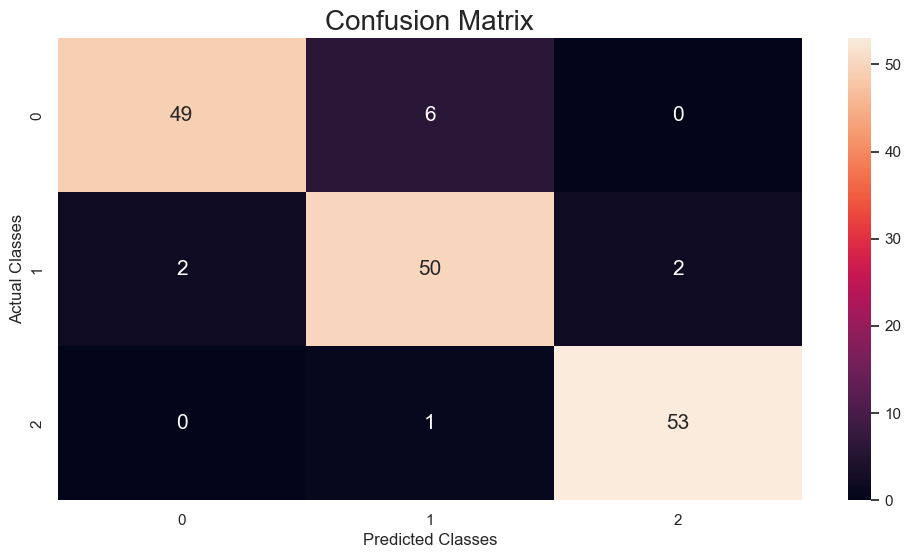

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_dataframe = pd.DataFrame(cm, columns=lr.classes_, index=lr.classes_)
plt.figure(figsize = (12,6));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(penalty='l2',fit_intercept=False)

In [22]:
model.fit(X_train,y_train)

LogisticRegression(fit_intercept=False)

In [23]:
X_train_pred = model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,y_train)

In [24]:
print('Accuracy of training data:',training_data_accuracy)

Accuracy of training data: 0.9662058371735791


In [25]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of testing data:", accuracy)

Accuracy of testing data: 0.9325153374233128


In [30]:

model1 = RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6)
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6)

In [31]:
X_train_pred = model1.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,y_train)
print('Accuracy of training data:',training_data_accuracy)

Accuracy of training data: 0.9969278033794163
